In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,403 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and d

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# url을 가져와서 문서로 만드는 작업
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [4]:
key='S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D'
numRows=10
staD=str(20200410)
endD=str(20210831)
numRows=30

url1='http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey='+ key
url2='&pageNo=1&numOfRows='+str(numRows)
url3='&startCreateDt='+staD+'&endCreateDt='+endD
url=url1+url2+url3   

print(url)

http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19SidoInfStateJson?serviceKey=S5FgzVMaI4VnSdDKqpL5KZxsUmhhyDuYp5uEtbgdkcjiNs15Aw4199t39wANmq%2BTUjhIm999jORaRGsMwuUDrQ%3D%3D&pageNo=1&numOfRows=30&startCreateDt=20200410&endCreateDt=20210831


In [8]:
xml=requests.get(url)
soup=bs(xml.text,'html.parser')
soup

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>00</resultcode><resultmsg>NORMAL SERVICE.</resultmsg></header><body><items><item><createdt>2021-08-31 09:43:52.857</createdt><deathcnt>13</deathcnt><defcnt>5836</defcnt><gubun>검역</gubun><gubuncn>隔離區</gubuncn><gubunen>Lazaretto</gubunen><incdec>13</incdec><isolclearcnt>5312</isolclearcnt><isolingcnt>511</isolingcnt><localocccnt>0</localocccnt><overflowcnt>13</overflowcnt><qurrate>-</qurrate><seq>11846</seq><stdday>2021년 08월 31일 00시</stdday><updatedt>null</updatedt></item><item><createdt>2021-08-31 09:43:52.857</createdt><deathcnt>2</deathcnt><defcnt>2602</defcnt><gubun>제주</gubun><gubuncn>济州</gubuncn><gubunen>Jeju</gubunen><incdec>9</incdec><isolclearcnt>2330</isolclearcnt><isolingcnt>270</isolingcnt><localocccnt>8</localocccnt><overflowcnt>1</overflowcnt><qurrate>385.69</qurrate><seq>11845</seq><stdday>2021년 08월 31일 00시</stdday><updatedt>null</updatedt></item><item><createdt>2021-08-31 09:43:52.857</cre

In [9]:
data=soup.find_all('item')
con_lst=[]

for item in data:
    DEF_CNT = item.find('defcnt').text # 확진자수'
    Deat_CNT = item.find('deathcnt').text # 사망자수
    GUBUN = item.find('gubun').text # 지역'
    INC_DEC = item.find('incdec').text #전일대비 증감'
    STD_DAY = item.find('stdday').text # 기준일'
    ISOL_ING_CNT = item.find('isolingcnt').text#격리자수'
    OVER_FLOW_CNT = item.find('overflowcnt').text #해외유입'
    LOCAL_OCC_CNT = item.find('localocccnt').text #지역감염'
    con_lst.append({'stdday':STD_DAY,'ji':GUBUN,'isolingcnt':ISOL_ING_CNT,
                    'defcnt':DEF_CNT,'incdec':INC_DEC,'deathcnt':Deat_CNT,
                    'local':LOCAL_OCC_CNT,'overflow':OVER_FLOW_CNT})

In [10]:
con_lst

[{'deathcnt': '13',
  'defcnt': '5836',
  'incdec': '13',
  'isolingcnt': '511',
  'ji': '검역',
  'local': '0',
  'overflow': '13',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt': '2',
  'defcnt': '2602',
  'incdec': '9',
  'isolingcnt': '270',
  'ji': '제주',
  'local': '8',
  'overflow': '1',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt': '31',
  'defcnt': '9980',
  'incdec': '56',
  'isolingcnt': '858',
  'ji': '경남',
  'local': '56',
  'overflow': '0',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt': '88',
  'defcnt': '7100',
  'incdec': '27',
  'isolingcnt': '618',
  'ji': '경북',
  'local': '27',
  'overflow': '0',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt': '19',
  'defcnt': '2600',
  'incdec': '14',
  'isolingcnt': '206',
  'ji': '전남',
  'local': '13',
  'overflow': '1',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt': '60',
  'defcnt': '3588',
  'incdec': '26',
  'isolingcnt': '354',
  'ji': '전북',
  'local': '26',
  'overflow': '0',
  'stdday': '2021년 08월 31일 00시'},
 {'deathcnt':

In [11]:
# 데이터 프레임 제작

df = pd.DataFrame(con_lst)
df

# 데이터 정보 확인

# 데이터 결측치 확인

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   stdday      516 non-null    object
 1   ji          516 non-null    object
 2   isolingcnt  516 non-null    object
 3   defcnt      516 non-null    object
 4   incdec      516 non-null    object
 5   deathcnt    516 non-null    object
 6   local       516 non-null    object
 7   overflow    516 non-null    object
dtypes: object(8)
memory usage: 32.4+ KB


In [13]:
df.isna().sum()

stdday        0
ji            0
isolingcnt    0
defcnt        0
incdec        0
deathcnt      0
local         0
overflow      0
dtype: int64

## [형변환]

In [14]:
# 방법 1
#df['isolingcnt']=df['isolingcnt'].astype(int)
#df['defcnt']=df['defcnt'].astype(int)
#df['deathcnt']=df['deathcnt'].astype(int)
#df['local']=df['local'].astype(int)
#df['overflow']=df['overflow'].astype(int)


# 방법 2
col=['isolingcnt', 'defcnt', 'incdec', 'deathcnt', 'local', 'overflow']

for i in col:
    df[col]=df[col].astype(int)


# 방법 3
# col=[컬럼이름을 가져온변수에서 2:7번째까지의 이름을 가져옴]
# for i in col:
# df[col]=df[col].astype(int)

In [15]:
## 자료 기술통계
df.describe()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
count,516.000000,516.000000,516.000000,516.000000,516.00000,516.000000
mean,2626.494186,22719.133721,173.676357,216.153101,168.50000,5.186047
std,5870.341145,50167.372319,382.427085,475.594796,372.40069,11.778550
min,70.000000,763.000000,1.000000,1.000000,0.00000,0.000000
25%,332.000000,3621.250000,25.000000,24.000000,23.00000,0.000000
50%,602.000000,5560.500000,46.500000,57.000000,46.00000,1.000000
75%,1168.500000,10628.000000,90.000000,128.000000,89.00000,3.000000
max,28214.000000,251415.000000,2221.000000,2285.000000,2144.00000,77.000000


In [16]:
df[df['ji']=='제주']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
20,2021년 08월 30일 00시,제주,303,2593,12,2,12,0
39,2021년 08월 29일 00시,제주,341,2581,13,2,12,1
58,2021년 08월 28일 00시,제주,373,2568,21,2,19,2
77,2021년 08월 27일 00시,제주,399,2547,23,2,23,0
96,2021년 08월 26일 00시,제주,401,2524,30,2,30,0
115,2021년 08월 25일 00시,제주,428,2494,27,2,27,0
134,2021년 08월 24일 00시,제주,447,2467,30,2,30,0
153,2021년 08월 23일 00시,제주,471,2437,32,1,32,0
172,2021년 08월 22일 00시,제주,473,2405,35,1,35,0


In [17]:
df[df['stdday']=='2021년 08월 31일 00시']

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow
0,2021년 08월 31일 00시,검역,511,5836,13,13,0,13
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0
6,2021년 08월 31일 00시,충남,1098,6937,38,55,37,1
7,2021년 08월 31일 00시,충북,455,5152,15,73,15,0
8,2021년 08월 31일 00시,강원,396,5460,30,59,29,1
9,2021년 08월 31일 00시,경기,8733,71081,433,747,419,14


In [18]:
df['defcnt'].groupby(df['ji']).sum()

ji
강원     126546
검역     157110
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
합계    5557598
Name: defcnt, dtype: int64

## 전처리
- 합계와 검역자료를 제거
- 날짜데이터 형식을 날짜형식으로 변경해서 년, 월, 일 이런단위로 쪼갬

In [22]:
# 조건에 맞는 데이터 제거하고 새로운 데이터 프레임 제작
# 방법 1
newDf=df[(df['ji']!='검역')&(df['ji']!='합계')]
newDf['defcnt'].groupby(newDf['ji']).sum()

# 방법 2 newDf=df를 하고 조건에 맞는 자료만 drop(행단위로 axis=0)
# 방법 3 newDf=df를 하고 조건에 맞는 자료를 nan으로 변경한뒤 dropna로 제거

ji
강원     126546
경기    1682105
경남     249346
경북     178238
광주     104962
대구     357147
대전     142351
부산     275498
서울    1965322
세종      23212
울산     104332
인천     296572
전남      65681
전북      89329
제주      61652
충남     169354
충북     116718
Name: defcnt, dtype: int64

In [23]:
newDf.corr()

,isolingcnt,defcnt,incdec,deathcnt,local,overflow
isolingcnt,1.000000,0.993543,0.969242,0.942039,0.969495,0.720412
defcnt,0.993543,1.000000,0.968791,0.962850,0.968815,0.731520
incdec,0.969242,0.968791,1.000000,0.942731,0.999914,0.760173
deathcnt,0.942039,0.962850,0.942731,1.000000,0.941928,0.752914
local,0.969495,0.968815,0.999914,0.941928,1.000000,0.751582
overflow,0.720412,0.731520,0.760173,0.752914,0.751582,1.000000


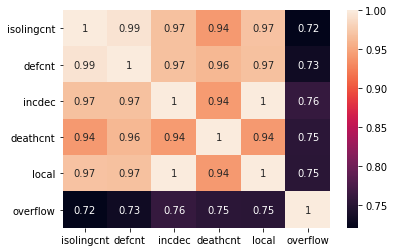

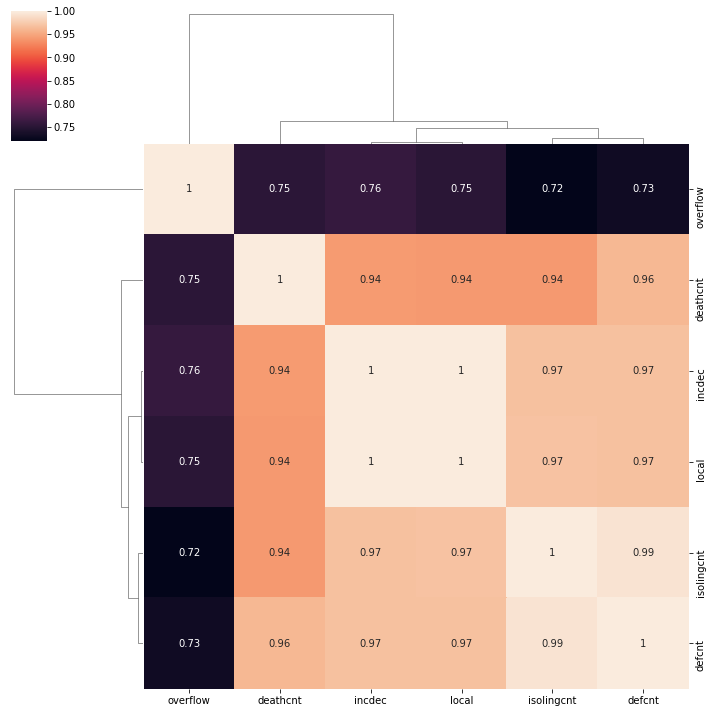

In [26]:
import seaborn as sns
sns.heatmap(newDf.corr(), annot=True)

sns.clustermap(newDf.corr(), annot=True)

In [33]:
#for i in newDf['stdday']:
#    날짜=i.split('일')[0]


In [31]:
# 날짜형식은 년-월-일

newDf['Date']=newDf['stdday'].str.split('일').str[0]
newDf['Date']=newDf['Date'].str.replace('년','-')
newDf['Date']=newDf['Date'].str.replace('월','-')
newDf['Date']=newDf['Date'].str.replace(' ','-')

newDf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,stdday,ji,isolingcnt,defcnt,incdec,deathcnt,local,overflow,Date
1,2021년 08월 31일 00시,제주,270,2602,9,2,8,1,2021--08--31
2,2021년 08월 31일 00시,경남,858,9980,56,31,56,0,2021--08--31
3,2021년 08월 31일 00시,경북,618,7100,27,88,27,0,2021--08--31
4,2021년 08월 31일 00시,전남,206,2600,14,19,13,1,2021--08--31
5,2021년 08월 31일 00시,전북,354,3588,26,60,26,0,2021--08--31
...,...,...,...,...,...,...,...,...,...
511,2021년 08월 04일 00시,울산,145,3262,15,41,14,1,2021--08--04
512,2021년 08월 04일 00시,대전,1121,4459,59,30,59,0,2021--08--04
513,2021년 08월 04일 00시,광주,215,3464,16,24,15,1,2021--08--04
514,2021년 08월 04일 00시,인천,1144,9342,83,66,83,0,2021--08--04


In [44]:
from datetime import datetime, timedelta

newDf['Date']=pd.to_datetime(newDf['Date'])
newDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 1 to 515
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   stdday      464 non-null    datetime64[ns]
 1   ji          464 non-null    object        
 2   isolingcnt  464 non-null    int64         
 3   defcnt      464 non-null    int64         
 4   incdec      464 non-null    int64         
 5   deathcnt    464 non-null    int64         
 6   local       464 non-null    int64         
 7   overflow    464 non-null    int64         
 8   Date        464 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 56.2+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
newDf['year']=newDf['Date'].dt.year
newDf['month']=newDf['Date'].dt.month
newDf['dayName']=newDf['Date'].dt.day_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [47]:
newDf['dayName']

newDf['stdday'].unique()

array(['2021-08-31T00:00:00.000000000', '2021-08-30T00:00:00.000000000',
       '2021-08-29T00:00:00.000000000', '2021-08-28T00:00:00.000000000',
       '2021-08-27T00:00:00.000000000', '2021-08-26T00:00:00.000000000',
       '2021-08-25T00:00:00.000000000', '2021-08-24T00:00:00.000000000',
       '2021-08-23T00:00:00.000000000', '2021-08-22T00:00:00.000000000',
       '2021-08-21T00:00:00.000000000', '2021-08-20T00:00:00.000000000',
       '2021-08-19T00:00:00.000000000', '2021-08-18T00:00:00.000000000',
       '2021-08-17T00:00:00.000000000', '2021-08-16T00:00:00.000000000',
       '2021-08-15T00:00:00.000000000', '2021-08-14T00:00:00.000000000',
       '2021-08-13T00:00:00.000000000', '2021-08-12T00:00:00.000000000',
       '2021-08-11T00:00:00.000000000', '2021-08-10T00:00:00.000000000',
       '2021-08-09T00:00:00.000000000', '2021-08-08T00:00:00.000000000',
       '2021-08-07T00:00:00.000000000', '2021-08-06T00:00:00.000000000',
       '2021-08-05T00:00:00.000000000', '2021-08-04

-----제주--------------


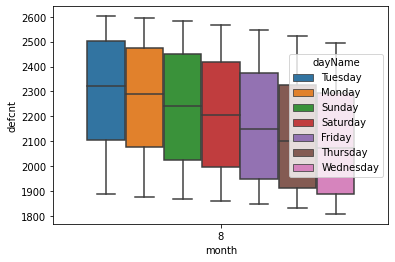

-----경남--------------


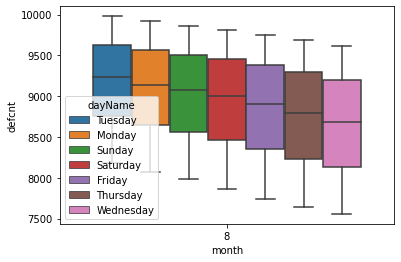

-----경북--------------


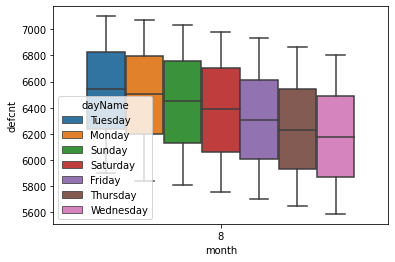

-----전남--------------


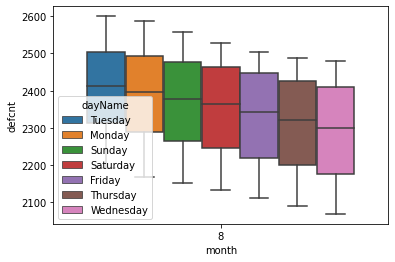

-----전북--------------


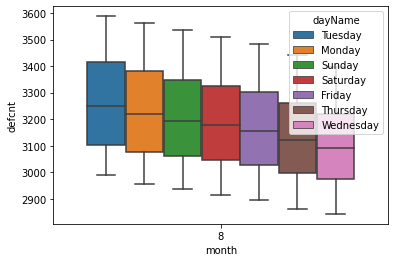

-----충남--------------


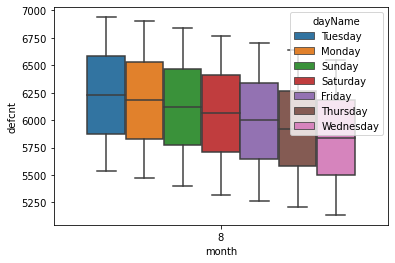

-----충북--------------


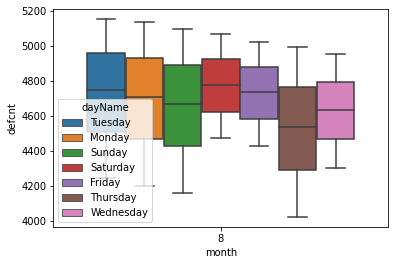

-----강원--------------


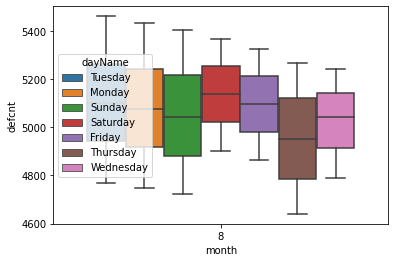

-----경기--------------


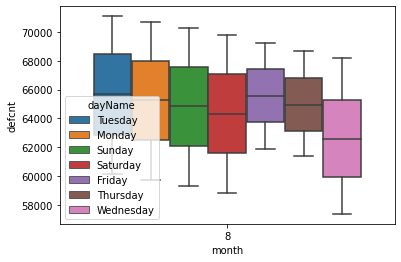

-----세종--------------


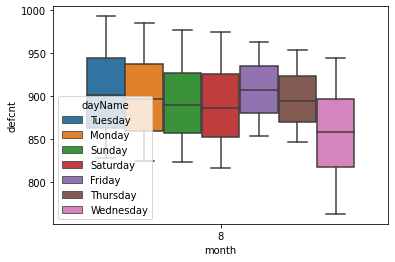

-----울산--------------


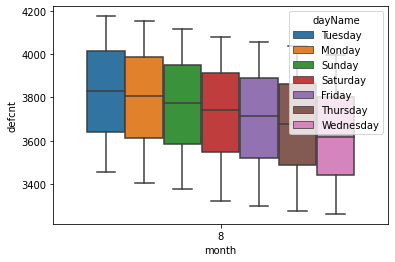

-----대전--------------


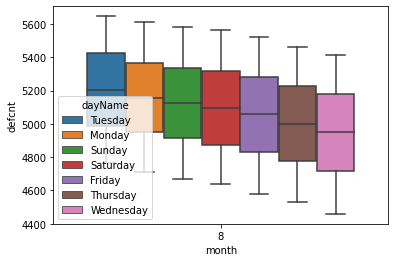

-----광주--------------


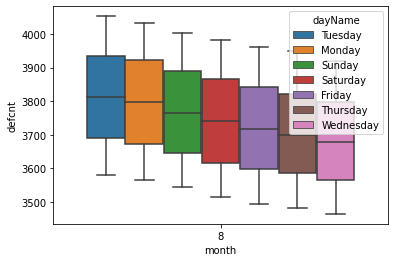

-----인천--------------


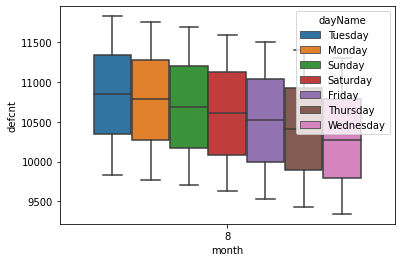

-----대구--------------


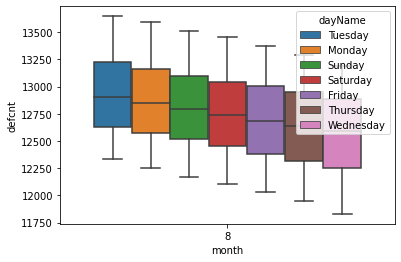

-----부산--------------


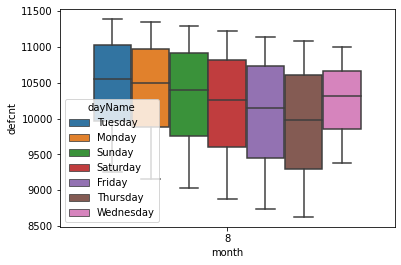

-----서울--------------


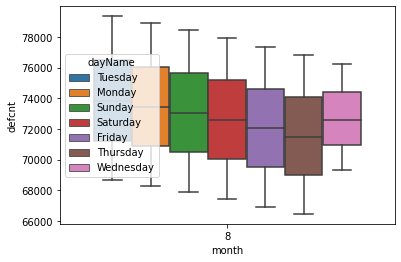

In [48]:
import matplotlib.pyplot as plt

List=newDf['ji'].unique()

for i in List:

    print('-----'+i+'--------------')
    tmp=newDf[newDf['ji']==i]
    # sns.boxplot(x='dayName', y='defcnt', data=tmp)
    sns.boxplot(x='month', y='defcnt', hue=tmp['dayName'], data=tmp)
    plt.show()